<a href="https://colab.research.google.com/github/snehotosh/Deep-Learning/blob/master/2_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

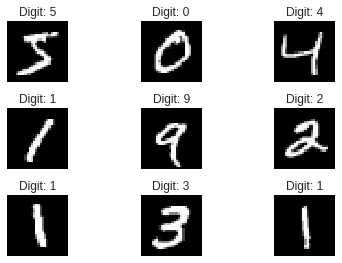

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [5]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [0]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [0]:
x_train = x_train/255.
x_test = x_test/255.


In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
from tensorflow.keras import layers,models

In [0]:
#Building Sequential Model Architecture
model = models.Sequential()
#----------------------------------------------------------------------------
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#----------------------------------------------------------------------------
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
#----------------------------------------------------------------------------
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

In [0]:
# Compiling the model
# https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [0]:
# https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        rotation_range=10,                    # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                     # Randomly zoom image 
        width_shift_range=0.1,                # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,               # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,                # randomly flip images
        vertical_flip=False)                  # randomly flip images


datagen.fit(x_train)

In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
# Fit the model
# Taking too much time.But may give 99.97 accuracy
# https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = 30, validation_data = (x_test,y_test),
                              verbose = 1, 
                              steps_per_epoch = x_train.shape[0],
                              callbacks = [learning_rate_reduction])

In [49]:
# Model fitting
history = model.fit(x=x_train,y=y_train,epochs=30,verbose=1,validation_data=(x_test, y_test),batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 171us/sample - loss: 1.1041 - accuracy: 0.5992 - val_loss: 0.1833 - val_accuracy: 0.9409
Epoch 2/30
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1776 - accuracy: 0.9452 - val_loss: 0.0938 - val_accuracy: 0.9695
Epoch 3/30
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1118 - accuracy: 0.9657 - val_loss: 0.0770 - val_accuracy: 0.9739
Epoch 4/30
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0853 - accuracy: 0.9736 - val_loss: 0.0539 - val_accuracy: 0.9826
Epoch 5/30
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0695 - accuracy: 0.9783 - val_loss: 0.0470 - val_accuracy: 0.9846
Epoch 6/30
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 7/30
60000/60000 [====================

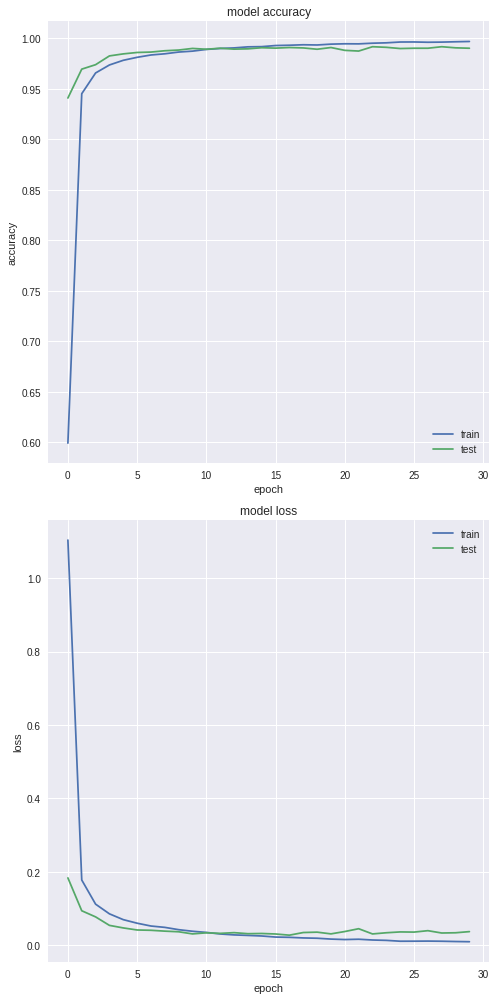

In [50]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [51]:
loss_and_metrics = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 147us/sample - loss: 0.0369 - accuracy: 0.9902


In [52]:
print('Test Accuracy:',loss_and_metrics[1])
print('Test Loss:',loss_and_metrics[0])

Test Accuracy: 0.9902
Test Loss: 0.03689659099441585


In [0]:
predicted_classes = model.predict_classes(x_test)

In [54]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0] # return the index of matching elements
incorrect_indices = np.nonzero(predicted_classes != y_test)[0] # return the index of non-matching elements
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")



9902  classified correctly
98  classified incorrectly


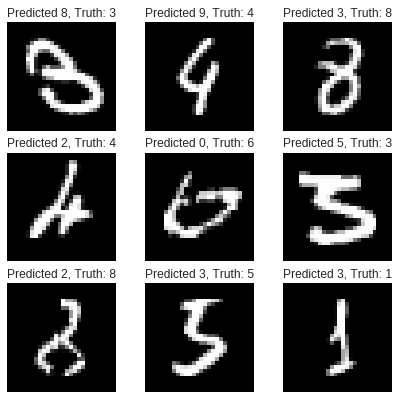

In [55]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

#figure_evaluation